### Task:
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

In [ ]:
#Questions
Can you count something interesting?
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
Can you make a bar plot or a histogram?
Can you compare two related quantities?
Can you make a scatterplot?
Can you make a time-series plot?

### Quickview of the data

In [2]:
import os

In [3]:
import system

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pprint
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [5]:
os.chdir("/Users/lilie/Desktop/")

In [6]:
df = pd.read_csv("flights.csv")

/Users/lilie/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [9]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


#### Finding Trends
The distribution between DEPARTURE_DELAY AND WEATHER_DELAYS seems to follow a positive skew which is shift to the right.

Text(0, 0.5, 'WEATHER_DELAY')

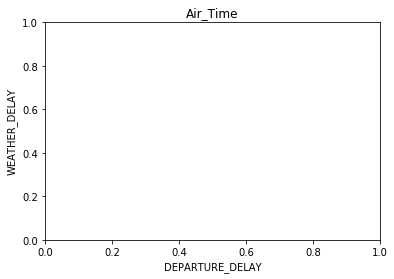

In [10]:
fig, ax = plt.subplots()
ax.set_title('Air_Time')
ax.set_xlabel('DEPARTURE_DELAY')
ax.set_ylabel('WEATHER_DELAY')


count    1.063439e+06
mean     2.915290e+00
std      2.043334e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.211000e+03
Name: WEATHER_DELAY, dtype: float64

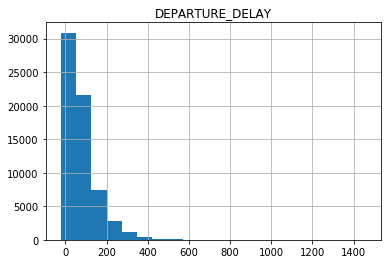

In [11]:
# chart for histogram
df[df['WEATHER_DELAY']>0].hist(column='DEPARTURE_DELAY', bins= 20)
df.WEATHER_DELAY.describe()

### Making Bar Plot or a Histogram?

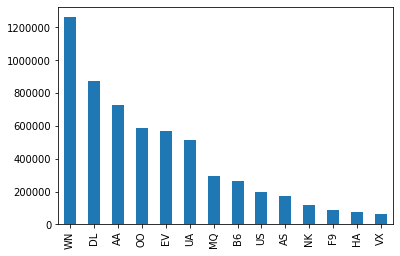

In [12]:
df["AIRLINE"].value_counts().plot(kind="bar")

### Compare Two Related Quantities
FROM THE GRAPH BELOW WE CAN CONCLUDE THAT THE GREATEST DEPARTURE_DELAY APPEARSIN FLIGHTS WITH ELAPSED_TIME BETWEEN 50-200 
ALSO,IN GENERAL THE GREATEST THE ELAPSED-TIME IS THE SMALLER DEPARTURE_DELAY GETS.

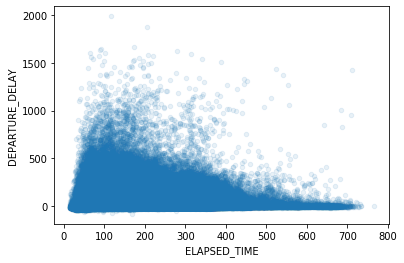

In [13]:
#Scater plot for departure_delay and weather_delay

df[df.AIR_TIME >0].plot(kind = 'scatter', x='ELAPSED_TIME', y = 'DEPARTURE_DELAY', alpha=0.1)#.set_yscale('log')

### Making Scatterplot

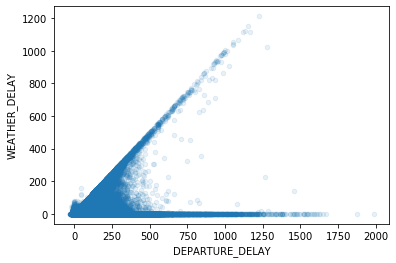

In [14]:
#Scater plot for departure_delay and weather_delay

df[(df.AIR_TIME >0) | (df['WEATHER_DELAY']>0)].plot(kind = 'scatter', 
                                                    x='DEPARTURE_DELAY', 
                                                    y = 'WEATHER_DELAY', alpha=0.1)#.set_yscale('log

### Making a time-series plot

In [17]:
print(df.groupby(df.MONTH).count())

         YEAR     DAY  DAY_OF_WEEK  AIRLINE  FLIGHT_NUMBER  TAIL_NUMBER  \
MONTH                                                                     
1      469968  469968       469968   469968         469968       467186   
2      429191  429191       429191   429191         429191       425597   
3      504312  504312       504312   504312         504312       502498   
4      485151  485151       485151   485151         485151       484572   
5      496993  496993       496993   496993         496993       496413   
6      503897  503897       503897   503897         503897       502422   
7      520718  520718       520718   520718         520718       519995   
8      510536  510536       510536   510536         510536       509727   
9      464946  464946       464946   464946         464946       464628   
10     486165  486165       486165   486165         486165       485811   
11     467972  467972       467972   467972         467972       467440   
12     479230  479230    

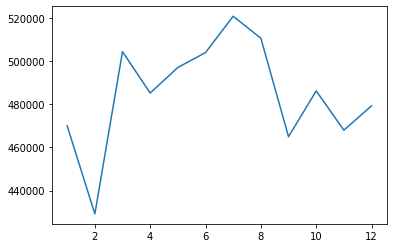

In [19]:
plt.plot(df.groupby(df.MONTH).count().FLIGHT_NUMBER)

###   Conclusion-Based on the time-series plot February was the month with fewer flights in 2015 while july had the highest flights.